# 3a -- Data Processing

Digging into Numpy and Pandas. Revisiting functions and lambdas.

### Reading/References

* [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) (VanderPlas 2017) -- github
  * Chapter 2. Introduction to Numpy
  * [02.01-Understanding-Data-Types.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.01-Understanding-Data-Types.ipynb)
  * [02.02-The-Basics-Of-NumPy-Arrays.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.02-The-Basics-Of-NumPy-Arrays.ipynb)


## Reintroducing NumPy -- array data types

In [1]:
import numpy as np

# Numpy was 1.11.1 when VanderPlas published in 2017
np.__version__

'1.19.5'

In [2]:
# Python has fixed-type arrays
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# But simple math doesn't work -- the following line throws a "TypeError"
#A / 2

In [4]:
# Creation of a numpy array is just as easy
A = np.array(L)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# And you can perform simple math with numpy arrays
A / 2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [6]:
# You can inspect the type of numpy array objects
# Q: Why is A.dtype "int64" if you just divided A / 2?
print(type(A))
print(A.dtype)

<class 'numpy.ndarray'>
int64


In [7]:
# Answer...
a = A / 2
print(a.dtype)
a

float64


array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [8]:
# Q: What's the type of this numpy array?
a = np.array([1, 2, 'three'])
a

array(['1', '2', 'three'], dtype='<U21')

In [9]:
# A: Unicode string.  
# Ref: https://numpy.org/doc/stable/reference/arrays.dtypes.html
print(type(a[0]))
print(type(a[2]))
print(a.dtype)

<class 'numpy.str_'>
<class 'numpy.str_'>
<U21


In [10]:
# Everything in python is an object
a = [('name', np.unicode_, 16), ('grades', np.float64, (2,))]
dt = np.dtype(a)
print(a)
print(type(a))
print(dt)
print(type(a))
print(type(a[1]))
print(type(a[1][2][0]))

[('name', <class 'numpy.str_'>, 16), ('grades', <class 'numpy.float64'>, (2,))]
<class 'list'>
[('name', '<U16'), ('grades', '<f8', (2,))]
<class 'list'>
<class 'tuple'>
<class 'int'>


# NumPy array basics

In [11]:
# Multi-dimensional arrays
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

In [12]:
# Each arrray has attributes referring to size & shape
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

print('dtype:', x3.dtype)
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes") # should be: itemsize * size

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64
itemsize: 8 bytes
nbytes: 480 bytes


In [13]:
# Array indexing -- we've seen (some of) these before
print(x1)
print(x1[:])
print(x1[2::2])
print(x3[0][1][2])
print(x3[:][-1][-1])
print(x3[:, -1, -1])

[5 0 3 3 7 9]
[5 0 3 3 7 9]
[3 7]
3
[9 4 4 6 4]
[7 1 4]


In [14]:
x3[0]

array([[8, 1, 5, 9, 8],
       [9, 4, 3, 0, 3],
       [5, 0, 2, 3, 8],
       [1, 3, 3, 3, 7]])

In [15]:
x3[0, :, :]

array([[8, 1, 5, 9, 8],
       [9, 4, 3, 0, 3],
       [5, 0, 2, 3, 8],
       [1, 3, 3, 3, 7]])

In [16]:
x3[0][:][:]

array([[8, 1, 5, 9, 8],
       [9, 4, 3, 0, 3],
       [5, 0, 2, 3, 8],
       [1, 3, 3, 3, 7]])

### Exercise

How would you index `x3` to produce an array equal to: `[2, 0, 0, 4, 5]`?

# Array slices are views, **not** copies!
One important (and extremely useful) thing to know about array slices is that they return views rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. 

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

In [17]:
# Recreate the arrays from before (in case they've changed)
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array

# This is the array created above, with size (3, 4)
print('original from before:\n', x2)

# Create a slice
x2_sub = x2[:2, :2]
print('slice (sub array):\n', x2_sub)

original from before:
 [[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
slice (sub array):
 [[3 5]
 [7 6]]


In [18]:
# Modify the slice
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [19]:
# The original has changed as well!
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [20]:
# You can copy arrays, but you need to be explicit
x2_sub_copy = x2[:2, :2].copy()
print('sub-array copy before:\n', x2_sub_copy)

# in which case, changing the copy leaves the original unchanged
x2_sub_copy[0][0] = 42

print('sub-array copy after:\n', x2_sub_copy)
print('original after:\n', x2)

sub-array copy before:
 [[99  5]
 [ 7  6]]
sub-array copy after:
 [[42  5]
 [ 7  6]]
original after:
 [[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## List slices are **not** views

In [21]:
# Our 2-D array from above. This time, as a list
a = [[3, 5, 2, 4],
     [7, 6, 8, 8],
     [1, 6, 7, 7]]
print('list:\n', a)

# This works because you access each of the list elements in succession
b = a[0][:][:]
print('sliced list:\n', b)

# This does NOT work, because there are no multi-dimensional lists. It throws:
# TypeError: list indices must be integers or slices, not tuple
#b = a[0, :, :]

b[0] = 99
print('sliced list after:\n', b)
print('original list after:\n', a)

# List do not have convenient attributes either.
# The next line throws an AttributeError
# print(a.shape)

list:
 [[3, 5, 2, 4], [7, 6, 8, 8], [1, 6, 7, 7]]
sliced list:
 [3, 5, 2, 4]
sliced list after:
 [99, 5, 2, 4]
original list after:
 [[3, 5, 2, 4], [7, 6, 8, 8], [1, 6, 7, 7]]


## Reshaping arrays

This technique is used a lot in data science modeling.

Where possible, the reshape method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

In [22]:
# Create a one-dimensional array
row_vector = np.arange(1, 10)
print("row_vector.shape:", row_vector.shape)
print("row_vector:", row_vector)

# 2-dimensional, single column
column_vector = row_vector[:, np.newaxis]
print("column_vector.shape:", column_vector.shape)
print("column vector:\n", column_vector)

# 2-dimensional, 3 rows, 3 columns
grid = column_vector.reshape((3, 3))
print('grid.shape:', grid.shape)
print('grid:\n', grid)

row_vector.shape: (9,)
row_vector: [1 2 3 4 5 6 7 8 9]
column_vector.shape: (9, 1)
column vector:
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
grid.shape: (3, 3)
grid:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


## Array concatenation

Concatenating can be done several ways...

* `np.concatenate`
* `np.vstack`
* `np.hstack`

In [23]:
# Concatenating
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
combined = np.concatenate([x, y])

print("x:", x)
print("y:", y)
print(combined)

x: [1 2 3]
y: [3 2 1]
[1 2 3 3 2 1]


In [24]:
# Horizontal stakking
print("x:", x)
print("y:", y)
print("hstack:", np.hstack([x,y]))

x: [1 2 3]
y: [3 2 1]
hstack: [1 2 3 3 2 1]


In [25]:
# Vertical stacking
print("x:", x)
print("y:", y)
print("vstack:\n", np.vstack([x,y]))

x: [1 2 3]
y: [3 2 1]
vstack:
 [[1 2 3]
 [3 2 1]]


## Array splitting

Concatenating can be done several ways as well...

* `np.split`
* `np.vsplit`
* `np.hsplit`


In [26]:
# Spllitting -- the 2nd argument to "np.split()" is a list of "split points"
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [27]:
grid = np.arange(16).reshape((4, 4))
print("grid:\n", grid)

upper, lower = np.vsplit(grid, [3])
print("vsplit upper:\n", upper)
print("vsplit lower:\n", lower)

left, right = np.hsplit(grid, [3])
print("hsplit left:\n", left)
print("hsplit right:\n", right)

grid:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
vsplit upper:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
vsplit lower:
 [[12 13 14 15]]
hsplit left:
 [[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
hsplit right:
 [[ 3]
 [ 7]
 [11]
 [15]]


# Computation on arrays

* The standard Python implementation can be very slow.
* Repetitive operations can become bottlenecks when run in series
* Parallelization speeds things up -- introducing Universal Functions (ufuncs)
* These provide one way to define "big" data -- and explaining the value of NumPy

## Profiling code

* `%timeit` line-magic and `%%timeit` are Jupyter "magic" functions
* they can be used to time the repeated execution of snippets of code
* for fast operations, `%timeit` automatically does a large number of repetitions. 
* for slower commands, `%timeit` automatically adjusts with fewer repetitions

Refs:

* [01.07-Timing-and-Profiling.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb)
* [02.03-Computation-on-arrays-ufuncs](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.03-Computation-on-arrays-ufuncs.ipynb)

In [28]:
# Function to compute reciprocals
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

# Try it out with a small array    
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [29]:
# Timing execution with a big array
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1 loop, best of 5: 2.25 s per loop


In [30]:
# Comparing our custom function with vectorized numpy calculation (no surprise, they're the same)
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [31]:
# The vectorized calculation is 1000 times faster than the for loop!
%timeit (1.0 / big_array)

1000 loops, best of 5: 1.54 ms per loop


# Indexing with numpy

* [02.06-Boolean-Arrays-and-Masks.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.06-Boolean-Arrays-and-Masks.ipynb)
* [02.07-Fancy-Indexing.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.07-Fancy-Indexing.ipynb)

In [32]:
# Get Seattle rainfall for 2014 (from VanderPlas' github site)
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
url = "https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/data/Seattle2014.csv"
rainfall = pd.read_csv(url)['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
print(inches.shape)

(365,)



## Case study: Seattle precipitation

Hypothesis: Seattle has a lot of rain!

* histogram: despite its reputation, the vast majority of days in Seattle saw near zero measured rainfall in 2014. 
* Q: How many rainy days were there in the year? 
* Q: What is the average precipitation on those rainy days? 
* Q: How many days were there with more than half an inch of rain?

To answer these questions...

* Option 1: Create functions that loop through values 
* Option 2: Numpy ufuncs

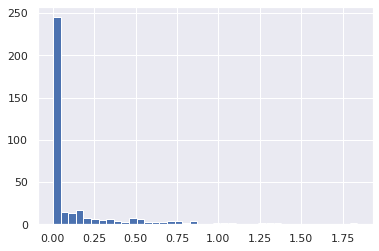

In [33]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(inches, 40);

In [34]:
# Option 2: ufuncs with boolean expressions

x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [35]:
# Compound expressions (mathematics and boolean operation)
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [36]:
# Q: how many values less than 3? -- np.count_nonzero() counts non-False entries
np.count_nonzero(x < 3)

2

In [37]:
# Answering the questions...
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean arrays as masks -- subsetting data

IMPORTANT: 

* Python's built-in sum(), any(), and all() functions have a different syntax than the NumPy versions. 
* They will fail or produce unintended results when used on multidimensional arrays. 
* Be sure to use np.sum(), np.any(), and np.all() for these examples!

In [38]:
# Boolean arrays as masks for subsetting the data -- powerful!!
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [39]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [40]:
# Using the boolean array as a mask
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [41]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


# Data indexing and subsetting with Pandas

* Series (1-D) & DataFrames (2-D)
* A Series has a dictionary-like interface
  * A Series also has Numpy's array-style item selection 
  * That is, it has: slices, masking, and fancy indexing
* [03.02-Data-Indexing-and-Selection.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.02-Data-Indexing-and-Selection.ipynb)

`

In [42]:
# 
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})

print(area, "\n\n", pop)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64 

 California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [43]:
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [44]:
# Individual Series objects from at DataFrame -- "dictionary-like access"
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [45]:
# Attribute-like access (compare with the previous cell)
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [46]:
# Series comparison
data.area is data['area']

True

In [47]:
# Q: What?!
data.pop is data['pop']

False

Answer: Attribute access **does not work** in all cases. For example, if the column names are not strings, or if the column names conflict with methods of the DataFrame, this attribute-style access is not possible. For example, the DataFrame has a pop() method, so data.pop will point to the method rather than the "pop" column

In [48]:
# Transpose -- swap rows and columns
data.T

,California,Texas,New York,Florida,Illinois
area,423967,695662,141297,170312,149995
pop,38332521,26448193,19651127,19552860,12882135


In [49]:
# DataFrame as a 2-D array
data.values

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]])

In [50]:
data.values[0]

array([  423967, 38332521])

### Another example

In [51]:
df = pd.DataFrame([[1,2], [3,4]])
df

,0,1
0,1,2
1,3,4


In [52]:
# Q: What happens if you execute the next line?
#df.0

In [53]:
# Q: If df.0 were possible, then what would the following mean?
# A: Unclear. And docs say that attribute indexing only holds for strings 
df[0]

0    1
1    3
Name: 0, dtype: int64

## Indexers: `loc`, `iloc`, and `ix`

In [54]:
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [55]:
data.iloc[0]

area      423967
pop     38332521
Name: California, dtype: int64

In [56]:
data.loc['California']

area      423967
pop     38332521
Name: California, dtype: int64

In [57]:
data.loc['California', 'pop']

38332521

In [58]:
# This throws a KeyError
#data.loc['pop']

In [59]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [60]:
# Q: Why does the next line throw an AttributeError?
# Check: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.02-Data-Indexing-and-Selection.ipynb
#data.ix[:3, :'pop']